In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path=r'E:\Machine Learning\team-learning-master'
data1=r'\端午粽子数据.csv'
data2=r'\摩拜单车数据.csv'
data3=r'\墨尔本温度数据.csv'

## 一.端午节的淘宝粽子交易
问题

(1) 请删除最后一列为缺失值的行，并求所有在杭州发货的商品单价均值。

(2) 商品标题带有“嘉兴”但发货地却不在嘉兴的商品有多少条记录？

(3) 请按照分位数将价格分为“高、较高、中、较低、低”5 个类别，再将

类别结果插入到标题一列之后，最后对类别列进行降序排序。

(4) 付款人数一栏有缺失值吗？若有则请利用上一问的分类结果对这些缺失
值进行合理估计并填充。

(5) 请将数据后四列合并为如下格式的 Series：商品发货地为 ××，店铺为
××，共计 ×× 人付款，单价为 ××。

(6) 请将上一问中的结果恢复成原来的四列。

In [3]:
df1=pd.read_csv(file_path+data1)
df1.head()

,标题,价格,付款人数,店铺,发货地址
0,五芳斋粽子礼盒 心悦+18只装咸鸭蛋组合端午节礼品团购嘉兴肉粽子,129,6人付款,五芳斋官方旗舰店,浙江 嘉兴
1,北京稻香村端午粽子手工豆沙粽220g*2袋散装豆沙粽香甜软糯豆沙粽,44,8人付款,天猫超市,上海
2,五芳斋粽子礼盒装鲜肉咸蛋黄大肉粽嘉兴豆沙甜粽端午团购散装礼品,89.9,100万+人付款,五芳斋官方旗舰店,浙江 嘉兴
3,稻香私房鲜肉粽蛋黄肉粽嘉兴粽子咸鸭蛋礼盒装端午节送礼特产团购,138,1936人付款,稻香村食品旗舰店,北京
4,嘉兴粽子 蛋黄鲜肉粽新鲜大肉粽早餐散装团购浙江特产蜜枣多口味,3.8,9500+人付款,城城喂食猫,浙江 嘉兴


第一题

In [4]:
df1.dropna(axis=0, how='any', subset=['发货地址 '],inplace=True)

In [5]:
len(df1)#4403，删除了3个含缺失值的行，剩余4400行

4400

In [19]:
df1.columns#注意空格

Index(['标题', ' 价格', '付款人数', '店铺', '发货地址 '], dtype='object')

In [22]:
df1.info()#真是很神奇的数据格式，全为object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4400 entries, 0 to 4402
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   标题      4400 non-null   object
 1    价格     4400 non-null   object
 2   付款人数    4329 non-null   object
 3   店铺      4400 non-null   object
 4   发货地址    4400 non-null   object
dtypes: object(5)
memory usage: 206.2+ KB


In [34]:
#使用正则匹配，将不符合条件的数据排除，只计算符合条件数据
df1[df1['发货地址 ']=='浙江 杭州'][' 价格'][(df1[' 价格'].str.replace(r'\d+\.?\d+','True')=='True')].astype('float').mean()

81.50651685393247

In [7]:
#看一下不符合条件的数据，可以看到只有4376，这里稍微修改一下
df1[~(df1[' 价格'].str.replace(r'\d+\.?\d+','True')=='True')]

,标题,价格,付款人数,店铺,发货地址
538,五芳斋粽子蛋黄鲜肉粽豆沙粽栗子肉棕子新鲜散装批发团购嘉兴肉粽,45.9.,1.0万+人付款,五芳斋官方旗舰店,浙江 嘉兴
1353,干粽叶包粽子的大粽子叶新鲜纯天然粽叶干粽子叶100张竹棕叶免邮,5,2353人付款,品粤品食品专营店,广东 深圳
2183,2020龙华古寺净素香粽菌菇板栗牛肝菌素肉梅干菜咸粽子顺丰100g,5,1421人付款,tb6744566_88,上海
2537,粽叶粽子叶新鲜天然野生大号包粽子的叶子家用棕子叶箬叶50片包装,4,1050人付款,劣狐狐,江苏 苏州
2813,五芳斋粽子迪士尼真空紫糯赤豆粽克50g*4嘉兴特产,9,607人付款,天猫超市,上海
3127,粽叶包粽子叶免邮50片新鲜的叶子箬竹叶天然野生大号棕叶箬叶家用,4,893人付款,珺玲食品专营店,上海
3166,老广的味道，肇庆传统裹蒸粽，鲜肉绿豆粽子，400g/个，5个起包邮,9,242人付款,加菲_damaomao,广东 肇庆
3174,湖州国芳粽子青豆玉米香肠粽,6,1605人付款,国芳食品旗舰店,浙江 湖州
3284,原创端午粽子包装袋30个食品可抽真空袋子加厚保鲜粽子机封袋大号,4,688人付款,海倪食品专营店,广东 广州
3390,2020龙华古寺净素香粽赤豆蜜枣黄米红枣藜麦豆沙甜粽子顺丰100g,5,1325人付款,tb6744566_88,上海


In [8]:
df1.loc[4376,' 价格']=45
df1.loc[538,' 价格']=45.9

In [38]:
df1[df1['发货地址 ']=='浙江 杭州'][' 价格'].astype('float').mean()

80.90088888888877

第二题

In [43]:
df1[df1['发货地址 ']!='浙江 嘉兴'][(df1['标题'].str.replace('.*嘉兴.*','True')=='True')]['标题'].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1032

第三题

In [9]:
df1[' 价格']=df1[' 价格'].astype('float')
df1[' 价格'].mean()

73.65447272727197

In [10]:
cutlist=[df1[' 价格'].quantile(x) for x in np.linspace(0,1,6)]
label=['高','较高','中','较低','低']
label.reverse()
df1['价格类型']=pd.cut(df1[' 价格'],cutlist,labels=label)
col=['标题','价格类型',' 价格','付款人数', '店铺', '发货地址 ']
df1=df1[col]
df1.sort_values(by='价格类型',ascending=False).head()

,标题,价格类型,价格,付款人数,店铺,发货地址
0,五芳斋粽子礼盒 心悦+18只装咸鸭蛋组合端午节礼品团购嘉兴肉粽子,高,129.0,6人付款,五芳斋官方旗舰店,浙江 嘉兴
660,五芳斋粽子百年五芳礼品粽大肉粽豆沙粽嘉兴粽子礼盒装 批发团购,高,328.0,20人付款,伟弘食品专营店,上海
1945,好利来礼盒粽子好礼香棕顺丰包邮沈阳发货员工福利采购团购优惠,高,109.0,11人付款,木宝很开心,辽宁 沈阳
1197,诸老大粽子诸事欢禧礼盒嘉兴特产蛋黄黑猪肉粽咸蛋端午送礼团购,高,180.0,20人付款,诸老大旗舰店,浙江 嘉兴
3171,重庆莎莲娜四川粽子端午节礼盒装团购2100g送礼领导送客户多口味,高,228.0,52人付款,melonsha88,重庆


第四题

In [11]:
df1[df1['付款人数'].isnull()]

,标题,价格类型,价格,付款人数,店铺,发货地址
183,五芳斋 140g*8只大粽子 福韵端午豆沙蜜枣蛋黄粽新包装送礼礼盒,中,50.90,NaN,天猫会员店,上海
243,五芳斋福雅五芳粽子礼盒端午咸甜粽子绿豆糕咸鸭蛋送礼,较高,79.90,NaN,天猫会员店,上海
347,【百草味】龙腾粽1090g 早餐大肉粽子湖州特产嘉兴粽,中,39.90,NaN,天猫会员店,上海
386,五芳斋华礼竹篮礼盒1360g蛋粽组合端午礼品嘉兴粽子礼盒,高,129.00,NaN,天猫会员店,上海
389,百草味 龙腾粽礼盒1460g 10只装早餐大肉粽子湖州特产嘉兴,中,49.90,NaN,天猫会员店,上海
...,...,...,...,...,...,...
2025,真真老老 嘉兴肉粽 130g 真空 粽子 端午节,低,4.50,NaN,天猫会员店,上海
2077,真真老老 嘉兴肉粽 130g 真空 粽子 端午节,低,4.50,NaN,天猫会员店,上海
2078,俏香阁蛋黄鲜肉粽子120g*2只端午节嘉兴特产速食早餐点心,低,5.90,NaN,天猫会员店,上海
2130,三珍斋蛋黄粽200g真空100g*2只嘉兴特产粽子速食早餐,低,7.88,NaN,天猫会员店,上海


In [25]:
df1['人数']=df1['付款人数'].str.extract(r'(?P<人数>\s*\d+万?)',expand=False)

In [30]:
df1['人数']=df1['人数'].str.replace('万$','0000').astype('float')

In [32]:
df1.groupby('价格类型')['人数'].agg(np.median)

价格类型
低     223.0
较低    128.0
中      79.0
较高     55.0
高      31.5
Name: 人数, dtype: float64

In [53]:
people_num=df1.groupby('价格类型')['人数'].apply(lambda x: x.fillna(x.median))

In [59]:
df1['人数']=people_num
df1['人数'].fillna(233,inplace=True)
df1['人数'].isnull().sum()

0

第五题：请将数据后四列合并为如下格式的 Series：商品发货地为 ××，店铺为 ××，共计 ×× 人付款，单价为 ××。


In [68]:
df1['拼接']=''
s=df1['拼接']
s=s.str.cat(['商品发货地为'+df1['发货地址 ']+'，店铺为'+df1['店铺']+'，共计'+df1['人数'].astype(str)+'人付款'+'，单价为'+df1[' 价格'].astype(str)])
s.head()

0         商品发货地为浙江 嘉兴，店铺为五芳斋官方旗舰店，共计6.0人付款，单价为129.0
1                 商品发货地为上海，店铺为天猫超市，共计8.0人付款，单价为44.0
2    商品发货地为浙江 嘉兴，店铺为五芳斋官方旗舰店，共计1000000.0人付款，单价为89.9
3         商品发货地为北京，店铺为稻香村食品旗舰店，共计1936.0人付款，单价为138.0
4           商品发货地为浙江 嘉兴，店铺为城城喂食猫，共计9500.0人付款，单价为3.8
Name: 拼接, dtype: object

第六题：请将上一问中的结果恢复成原来的四列。

In [70]:
s.str.extract(r'.*发货地为(?P<发货地址>.*)，店铺为(?P<店铺>.*)，共计(?P<付款人数>\d+\.?0*).*单价为(?P<价格>\d+\.?\d+)')

,发货地址,店铺,付款人数,价格
0,浙江 嘉兴,五芳斋官方旗舰店,6.0,129.0
1,上海,天猫超市,8.0,44.0
2,浙江 嘉兴,五芳斋官方旗舰店,1000000.0,89.9
3,北京,稻香村食品旗舰店,1936.0,138.0
4,浙江 嘉兴,城城喂食猫,9500.0,3.8
...,...,...,...,...
4398,浙江 嘉兴,红船旗舰店,347.0,7.9
4399,四川 乐山,峨眉山隐栗粑粑罗栗,80.0,93.0
4400,北京,北京美程嘉译,5.0,98.2
4401,安徽 合肥,chaoge1931,149.0,65.9


# 二、墨尔本每日最低温度

问题
(1) 剔除国庆节、五一劳动节和每月第一个周一，求每月的平均最低气温。
(2) 季节指数是一种对于周期性变化序列的特征刻画。记数据集中第 k 年
平均最低气温为 TYk(k = 1, ..., 10)，第 k 年第 j 个月平均最低气温为
TMkj(j = 1, ..., 12)，定义 Sj = ∑∑k TMkj
k TYk 。请按照如上定义，计算 12 个
月的季节指数 Sj。

(3) 移动平均法是一种时间序列的常见平滑方式，可分为 k 期移动平均和 k
期中心移动平均，都使用了某一时刻及其周围的数据对该时刻的数据进
行平滑修正。设原序列为 x1, ..., xn，对于 xt 的 k 期移动平均修正 xet 为 ∑k 1 i=0 xt i k ，对于 k 期中心移动平均修正为
xet =  1k (12xt k2 + xt k2 +1 + ... + xt + ... + xt+ k2 1 + 12xt+ k2 ), k is even
1k (xt k 1 2 + xt k 1 2 +1 + ... + xt + ... + xt+ k 1 2 1 + xt+ k 1 2 ), else
(a) 求原序列的 5 期移动平均序列。
(b) 求原序列的 5 期与 6 期中心移动平均序列。

In [94]:
df2=pd.read_csv(file_path+data3)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [95]:
df2['Date']=pd.to_datetime(df2['Date'])
print(df2['Date'].max(),df2['Date'].min())

1990-12-31 00:00:00 1981-01-01 00:00:00


In [96]:
df_result_1 = df2.copy()
df_result_1 = df_result_1.set_index('Date', drop=True)
df_result_1.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

In [97]:
day = pd.date_range(start='1981-1-1', end='1990-12-31', freq=pd.offsets.WeekOfMonth(1,1))
day


DatetimeIndex(['1981-01-05', '1981-02-02', '1981-03-02', '1981-04-06',
               '1981-05-04', '1981-06-01', '1981-07-06', '1981-08-03',
               '1981-09-07', '1981-10-05',
               ...
               '1990-03-05', '1990-04-02', '1990-05-07', '1990-06-04',
               '1990-07-02', '1990-08-06', '1990-09-03', '1990-10-01',
               '1990-11-05', '1990-12-03'],
              dtype='datetime64[ns]', length=120, freq='WOM-1MON')

In [98]:
hol = pd.date_range(start='1981-5-1', end='1981-5-3').append(pd.date_range(start='1981-10-1', end='1981-10-7'))
day.append(hol)
for i in range(1, 10):
    day = day.append(hol+pd.DateOffset(years=i))
day

DatetimeIndex(['1981-01-05', '1981-02-02', '1981-03-02', '1981-04-06',
               '1981-05-04', '1981-06-01', '1981-07-06', '1981-08-03',
               '1981-09-07', '1981-10-05',
               ...
               '1990-05-01', '1990-05-02', '1990-05-03', '1990-10-01',
               '1990-10-02', '1990-10-03', '1990-10-04', '1990-10-05',
               '1990-10-06', '1990-10-07'],
              dtype='datetime64[ns]', length=210, freq=None)

In [100]:
df2[~df2['Date'].isin(day)].set_index('Date').resample('M').mean().head()

,Temp
Date,
1981-01-31,17.776667
1981-02-28,17.637037
1981-03-31,13.330000
1981-04-30,12.210345
1981-05-31,9.520000


In [101]:
df_result_2 = df2.copy()
df_result_2 = df_result_2.set_index('Date', drop=True)

In [104]:
TY = df_result_2.resample('Y').mean().sum()
TMk = df_result_2.resample('M').mean()
print(TY)
TMk  

Temp    111.777534
dtype: float64


,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323
...,...
1990-08-31,7.825806
1990-09-30,9.166667
1990-10-31,11.345161


In [105]:
for i in range(1, 13):
    print('S{}={}\n'.format(i, round((TMk[TMk.index.month==i].sum()/TY).values[0], 4)))

S1=1.3447

S2=1.3758

S3=1.3031

S4=1.0815

S5=0.8827

S6=0.6511

S7=0.5987

S8=0.706

S9=0.8031

S10=0.9223

S11=1.1165

S12=1.2394



In [103]:
# 自身与前四个的均值
df_result_2.rolling(window=5, min_periods=0).sum()/5

,Temp
Date,
1981-01-01,4.14
1981-01-02,7.72
1981-01-03,11.48
1981-01-04,14.40
1981-01-05,17.56
...,...
1990-12-27,13.08
1990-12-28,13.02
1990-12-29,13.72


In [107]:
df_result_2.rolling(window=5, min_periods=0,center=True).sum()/5

,Temp
Date,
1981-01-01,11.48
1981-01-02,14.40
1981-01-03,17.56
1981-01-04,16.58
1981-01-05,16.16
...,...
1990-12-27,13.72
1990-12-28,14.28
1990-12-29,13.96


In [109]:
# 6 期移动平均序列
df_result_2.rolling(window=7).apply(lambda x:(x.sum()-x[0]/2-x[6]/2)/6).shift(-3)

,Temp
Date,
1981-01-01,NaN
1981-01-02,NaN
1981-01-03,NaN
1981-01-04,16.858333
1981-01-05,16.408333
...,...
1990-12-27,13.575000
1990-12-28,14.058333
1990-12-29,NaN


# 三、2016 年 8 月上海市摩拜单车骑行记录

问题
(1) 平均而言，周末单天用车量比工作日单天用车量更大吗？

(2) 工作日每天的高峰时间段大致为上午 7:30 至 9:30、下午 17:00 至 19:00，请问 8 月里早高峰骑行记录量（以 start_time 为准）高于晚高峰的有几天？

(3) 请给出在所有周五中（以 start_time 为准），记录条数最多的那个周五所在的日期，并在该天内分别按 30 分钟、2 小时、6 小时统计摩拜单车使用时间的均值。

(4) 请自行搜索相关代码或调用库，计算每条记录起点到终点的球面距离。

(5) 摩拜单车的骑行结束时间是以电子锁关闭的记录时间为准，但有时候用户会忘记关锁，导致骑行时间出现异常。同时，正常人的骑行速度往往大致落在一个合理的区间，请结合上一问中的球面距离和骑行起始、结束时间，找出潜在的异常骑行记录。

(6) 由于路线的曲折性，起点到终点的球面距离往往不能充分反应行程长度，请利用 track 列的路线坐标数据，计算估计实际骑行距离，并重新
仿照上一问的方法找出可能的异常记录。

In [3]:
df3=pd.read_csv(file_path+data2)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102361 entries, 0 to 102360
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   orderid           102361 non-null  int64  
 1   bikeid            102361 non-null  int64  
 2   userid            102361 non-null  int64  
 3   start_time        102361 non-null  object 
 4   start_location_x  102361 non-null  float64
 5   start_location_y  102361 non-null  float64
 6   end_time          102361 non-null  object 
 7   end_location_x    102361 non-null  float64
 8   end_location_y    102361 non-null  float64
 9   track             102361 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 7.8+ MB


In [76]:
df3.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track
0,78387,158357,10080,2016-08-20 06:57,121.348,31.389,2016-08-20 07:04,121.357,31.388,"121.347,31.392#121.348,31.389#121.349,31.390#1..."
1,891333,92776,6605,2016-08-29 19:09,121.508,31.279,2016-08-29 19:31,121.489,31.271,"121.489,31.270#121.489,31.271#121.490,31.270#1..."
2,1106623,152045,8876,2016-08-13 16:17,121.383,31.254,2016-08-13 16:36,121.405,31.248,"121.381,31.251#121.382,31.251#121.382,31.252#1..."
3,1389484,196259,10648,2016-08-23 21:34,121.484,31.320,2016-08-23 21:43,121.471,31.325,"121.471,31.325#121.472,31.325#121.473,31.324#1..."
4,188537,78208,11735,2016-08-16 07:32,121.407,31.292,2016-08-16 07:41,121.418,31.288,"121.407,31.291#121.407,31.292#121.408,31.291#1..."


In [4]:
df3['start_time']=pd.to_datetime(df3['start_time'])
df3['end_time']=pd.to_datetime(df3['end_time'])

In [84]:
df3[(df3['start_time'].dt.dayofweek<=5)&(df3['start_time'].dt.dayofweek>0)].shape[0]/5

14627.8

In [86]:
df3[(df3['start_time'].dt.dayofweek==0)|(df3['start_time'].dt.dayofweek==6)].shape[0]/2

14611.0

工作日每日单车使用量比周末多16.8辆，但总体来说相差较小

第二题

工作日每天的高峰时间段大致为上午 7:30 至 9:30、下午 17:00 至 19:00，请问 8 月里早高峰骑行记录量（以 start_time 为准）高于晚高峰的有几天？

In [116]:
def between_time1(x,start,end):
    l=[]
    start_h=int(start[0])
    start_m=int(start[2:])
    end_h=int(end[0])
    end_m=int(end[2:])
    for item in x.dt.time:
        h=item.hour
        m=item.minute
        if h==start_h and m>=start_m:
            l.append(True)
        elif h>start_h and h<end_h:
            l.append(True)
        elif h==end_h and m<=end_m:
            l.append(True)
        else:
            l.append(False)
    return l

def between_time2(x,start,end):
    l=[]
    start_h=int(start[:2])
    start_m=int(start[4:])
    end_h=int(end[:2])
    end_m=int(end[4:])
    for item in x.dt.time:
        h=item.hour
        m=item.minute
        if h==start_h and m>=start_m:
            l.append(True)
        elif h>start_h and h<end_h:
            l.append(True)
        elif h==end_h and m<=end_m:
            l.append(True)
        else:
            l.append(False)
    return l
            
list1=df3[between_time1(df3['start_time'],'7:30','9:30')].groupby(df3['start_time'].dt.day)['start_time'].count()
list2=df3[between_time2(df3['start_time'],'17:00','19:00')].groupby(df3['start_time'].dt.day)['start_time'].count()
list1[(list1>list2)]

start_time
4     416
29    901
30    854
Name: start_time, dtype: int64

早高峰大于晚高峰的有三天,分别为8月4日，29日，30日

(3) 请给出在所有周五中（以 start_time 为准），记录条数最多的那个周五所在的日期，并在该天内分别按 30 分钟、2 小时、6 小时统计摩拜单车使用时间的均值。

In [121]:
df3[df3['start_time'].dt.dayofweek==5].groupby(df3['start_time'].dt.day)['start_time'].count()
#在8月27日

start_time
6     2184
13    2800
20    3596
27    4779
Name: start_time, dtype: int64

In [5]:
df3['使用时间']=df3['end_time']-df3['start_time']
df3.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,使用时间
0,78387,158357,10080,2016-08-20 06:57:00,121.348,31.389,2016-08-20 07:04:00,121.357,31.388,"121.347,31.392#121.348,31.389#121.349,31.390#1...",00:07:00
1,891333,92776,6605,2016-08-29 19:09:00,121.508,31.279,2016-08-29 19:31:00,121.489,31.271,"121.489,31.270#121.489,31.271#121.490,31.270#1...",00:22:00
2,1106623,152045,8876,2016-08-13 16:17:00,121.383,31.254,2016-08-13 16:36:00,121.405,31.248,"121.381,31.251#121.382,31.251#121.382,31.252#1...",00:19:00
3,1389484,196259,10648,2016-08-23 21:34:00,121.484,31.320,2016-08-23 21:43:00,121.471,31.325,"121.471,31.325#121.472,31.325#121.473,31.324#1...",00:09:00
4,188537,78208,11735,2016-08-16 07:32:00,121.407,31.292,2016-08-16 07:41:00,121.418,31.288,"121.407,31.291#121.407,31.292#121.408,31.291#1...",00:09:00


In [6]:
df3.set_index('start_time',drop=False,inplace=True)
df3.sort_index(inplace=True)

In [8]:
df3[df3['start_time'].dt.day==27]['使用时间'].resample('30T').agg(np.mean)

start_time
2016-08-27 00:00:00   00:19:00
2016-08-27 00:02:00   00:10:00
2016-08-27 00:02:00   00:25:00
2016-08-27 00:04:00   00:05:00
2016-08-27 00:04:00   00:05:00
                        ...   
2016-08-27 23:56:00   00:26:00
2016-08-27 23:57:00   00:18:00
2016-08-27 23:58:00   00:11:00
2016-08-27 23:59:00   00:17:00
2016-08-27 23:59:00   00:08:00
Name: 使用时间, Length: 4779, dtype: timedelta64[ns]

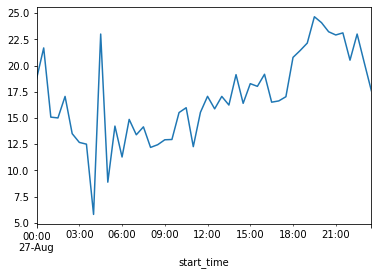

In [17]:
df3[df3['start_time'].dt.day==27]['使用时间'].resample('30T').agg(lambda x:x.values.astype('int64').mean()/(60*10**9)).plot()

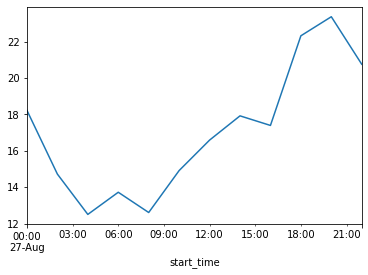

In [18]:
df3[df3['start_time'].dt.day==27]['使用时间'].resample('2H').agg(lambda x:x.values.astype('int64').mean()/(60*10**9)).plot()

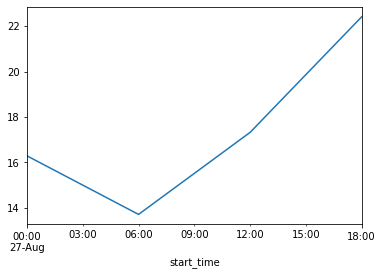

In [19]:
df3[df3['start_time'].dt.day==27]['使用时间'].resample('6H').agg(lambda x:x.values.astype('int64').mean()/(60*10**9)).plot()

In [117]:
df3['start_time'].dt.dayofweek

0         5
1         0
2         5
3         1
4         1
         ..
102356    6
102357    6
102358    5
102359    5
102360    1
Name: start_time, Length: 102361, dtype: int64

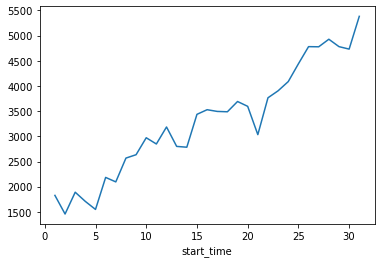

In [24]:
df3.groupby(df3['start_time'].dt.day)['orderid'].count().plot()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


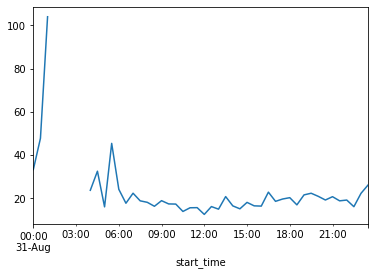

In [27]:
df3[df3['start_time'].dt.day==31]['使用时间'].resample('30T').agg(lambda x:x.values.astype('int64').mean()/(60*10**9)).plot()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py

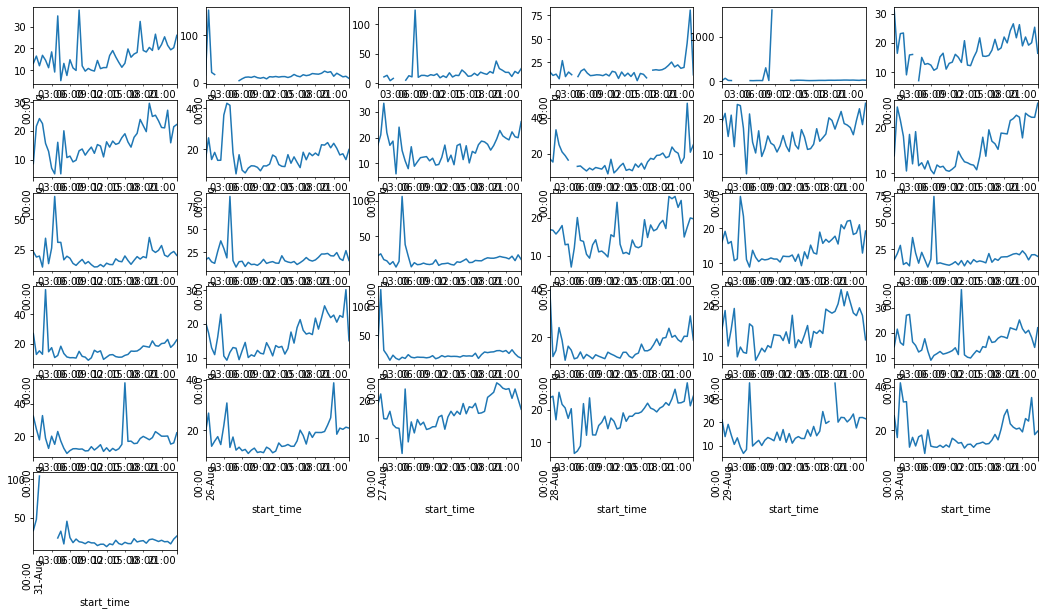

In [35]:
plt.figure(figsize=(18,10))
for i in range(1,32):
    plt.subplot(6,6,i)
    df3[df3['start_time'].dt.day==i]['使用时间'].resample('30T').agg(lambda x:x.values.astype('int64').mean()/(60*10**9)).plot()
    plt.xticks(rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


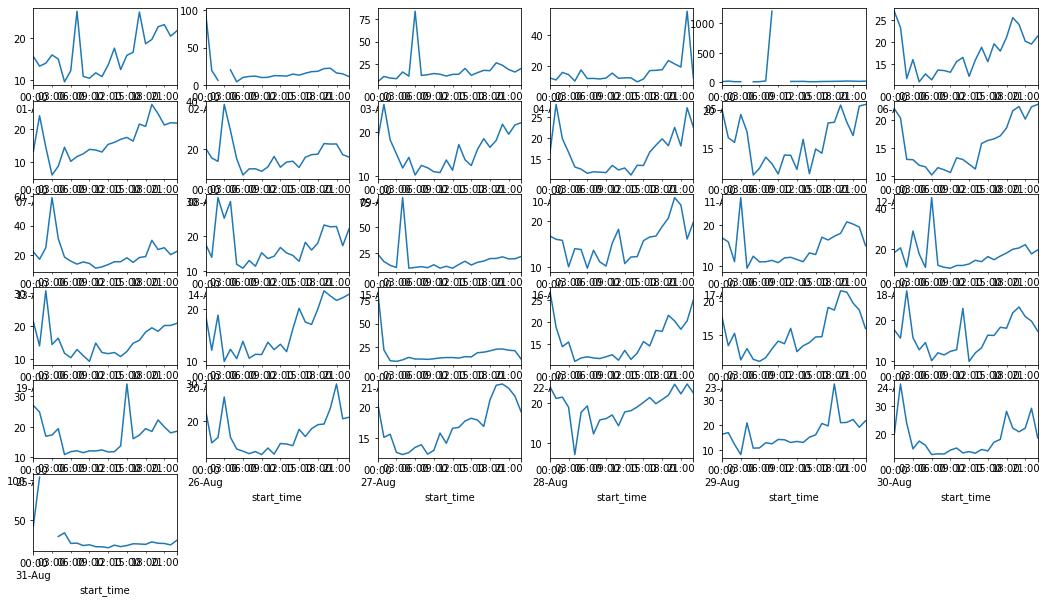

In [37]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
for i in range(1,32):
    plt.subplot(6,6,i)
    df3[df3['start_time'].dt.day==i]['使用时间'].resample('1H').agg(lambda x:x.values.astype('int64').mean()/(60*10**9)).plot()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


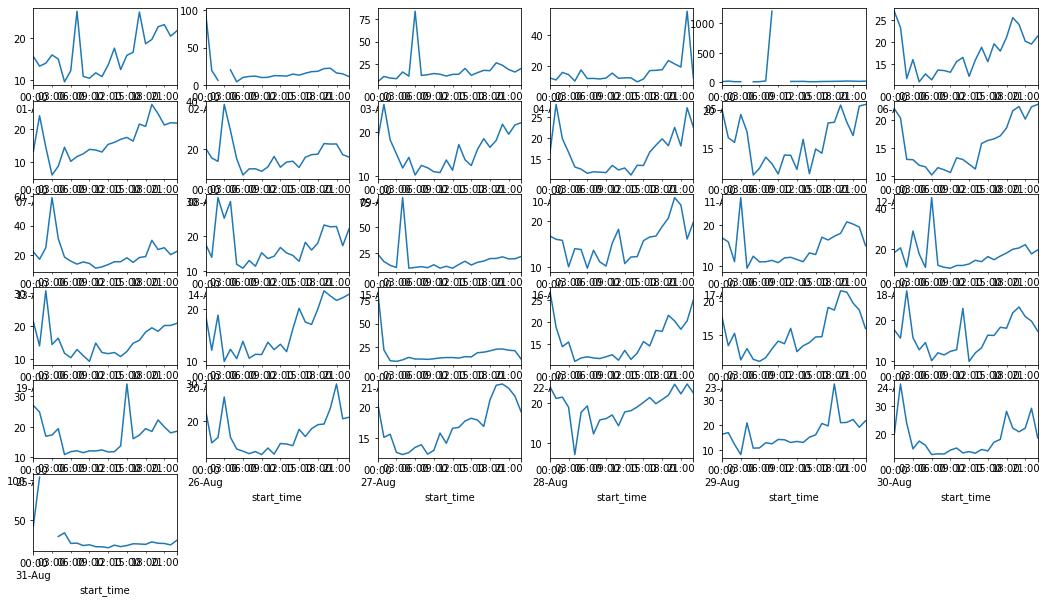

In [37]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
for i in range(1,32):
    plt.subplot(6,6,i)
    df3[df3['start_time'].dt.day==i]['使用时间'].resample('1H').agg(lambda x:x.values.astype('int64').mean()/(60*10**9)).plot()


(4)计算距离

In [ ]:
def geodistance(slng,slat,elng,elat):
    distances=[]
    for lng1, lat1, lng2, lat2 in zip(slng,slat,elng,elat):
        #lng1,lat1,lng2,lat2 = (120.12802999999997,30.28708,115.86572000000001,28.7427)
        lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2]) # 经纬度转换成弧度
        dlon=lng2-lng1
        dlat=lat2-lat1
        a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
        distance=2*asin(sqrt(a))*6371*1000 # 地球平均半径，6371km
        distance=round(distance,3)
        distances.append(distance)
    return distances

In [36]:
geodistance(df3['start_location_x'],df3['start_location_y'],df3['end_location_x'],df3['end_location_y'])

[861.505,
 2012.923,
 2195.18,
 1354.243,
 1135.936,
 2148.92,
 1789.263,
 2215.037,
 305.89,
 1912.818,
 505.665,
 5950.134,
 2255.004,
 1023.92,
 1416.358,
 1817.78,
 660.787,
 1101.043,
 488.076,
 1379.948,
 2024.046,
 146.332,
 1952.178,
 651.209,
 2842.155,
 587.585,
 1255.956,
 818.927,
 661.064,
 3110.329,
 1710.623,
 2169.249,
 1097.679,
 1734.459,
 612.064,
 1088.118,
 1372.462,
 505.662,
 1446.984,
 1257.057,
 934.235,
 5350.661,
 305.878,
 867.032,
 866.359,
 241.887,
 525.136,
 383.92,
 624.759,
 438.813,
 1228.507,
 1875.021,
 2159.959,
 1087.859,
 1223.451,
 346.843,
 2337.032,
 796.782,
 2064.331,
 883.4,
 3525.461,
 3015.773,
 3472.004,
 1810.272,
 346.869,
 1355.795,
 2670.371,
 1553.791,
 660.996,
 1097.996,
 4127.565,
 866.956,
 4671.153,
 2542.542,
 743.82,
 673.967,
 828.948,
 580.679,
 1224.06,
 220.295,
 1868.466,
 863.143,
 967.515,
 819.263,
 800.663,
 1241.259,
 701.424,
 2683.868,
 146.31,
 1884.726,
 2232.384,
 1380.461,
 624.872,
 862.568,
 2781.741,
 909.6

(5) 摩拜单车的骑行结束时间是以电子锁关闭的记录时间为准，但有时候用户会忘记关锁，导致骑行时间出现异常。同时，正常人的骑行速度往往
大致落在一个合理的区间，请结合上一问中的球面距离和骑行起始、结束时间，找出潜在的异常骑行记录。

In [39]:
df3['起始与终点间球面距离']=geodistance(df3['start_location_x'],df3['start_location_y'],df3['end_location_x'],df3['end_location_y'])
df3['骑行时间']=df3['使用时间'].values.astype('int64')/(10**9)
df3['骑行速度']=df3['起始与终点间球面距离']/df3['骑行时间']
df3.head(1)

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,使用时间,起始与终点间球面距离,骑行时间,骑行速度
0,78387,158357,10080,2016-08-20 06:57:00,121.348,31.389,2016-08-20 07:04:00,121.357,31.388,"121.347,31.392#121.348,31.389#121.349,31.390#1...",00:07:00,861.505,420.0,2.051202


In [92]:
def find_abnormal(df,col_name,scale=3):
    data_col=df[col_name]
    Q1=data_col.quantile(0.25)
    Q3=data_col.quantile(0.75)
    IQR=Q3-Q1
    df_abnormal=df[data_col<Q1-scale*IQR].append(df[data_col>Q3+scale*IQR])
    return df_abnormal


In [93]:
find_abnormal(df3,'骑行速度')

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,使用时间,起始与终点间球面距离,骑行时间,骑行速度,轨迹距离,轨迹速度
5538,1055151,87054,9751,2016-08-23 14:11:00,121.461,31.257,2016-08-23 14:12:00,121.457,31.256,"121.457,31.256#121.458,31.256#121.458,31.257#1...",00:01:00,396.147,60.0,6.602450,491.416,8.190267
7998,457489,35974,5129,2016-08-01 13:19:00,121.421,31.122,2016-08-01 13:20:00,121.424,31.123,"121.421,31.121#121.422,31.122#121.423,31.122",00:01:00,306.455,60.0,5.107583,241.565,4.026083
14216,561154,69054,11040,2016-08-23 09:00:00,121.449,31.157,2016-08-23 09:03:00,121.440,31.154,"121.439,31.156#121.440,31.155#121.440,31.156#1...",00:03:00,919.087,180.0,5.106039,594.211,3.301172
14890,1036335,195915,13004,2016-08-23 13:54:00,121.498,31.282,2016-08-23 13:55:00,121.501,31.280,"121.498,31.282#121.499,31.281#121.499,31.282#1...",00:01:00,361.572,60.0,6.026200,756.774,12.612900
15118,1049890,208376,3688,2016-08-13 15:28:00,121.482,31.280,2016-08-13 15:30:00,121.477,31.276,"121.477,31.276#121.477,31.277",00:02:00,650.856,120.0,5.423800,111.195,0.926625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92879,232997,17714,9397,2016-08-21 10:08:00,121.488,31.337,2016-08-21 10:10:00,121.481,31.336,"121.482,31.336#121.483,31.336#121.483,31.337#1...",00:02:00,674.057,120.0,5.617142,792.232,6.601933
96234,239234,165275,7553,2016-08-13 06:01:00,121.350,31.221,2016-08-13 06:02:00,121.353,31.220,"121.350,31.221#121.351,31.220#121.351,31.221#1...",00:01:00,306.180,60.0,5.103000,403.815,6.730250
97282,147841,213581,14958,2016-08-29 08:16:00,121.430,31.361,2016-08-29 08:42:00,120.486,31.477,"121.428,31.360#121.429,31.360#121.430,31.361#1...",00:26:00,90500.981,1560.0,58.013449,6378.123,4.088540
98025,473693,190444,805,2016-08-15 09:05:00,121.402,31.263,2016-08-15 09:07:00,121.395,31.264,"121.395,31.264#121.396,31.264#121.397,31.264#1...",00:02:00,674.566,120.0,5.621383,879.000,7.325000


In [14]:
find_abnormal(df3,'使用时间',3)

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,使用时间
7,270836,63136,11361,2016-08-29 09:21:00,121.369,31.252,2016-08-29 13:43:00,121.376,31.233,"121.367,31.238#121.367,31.239#121.368,31.240#1...",04:22:00
33,1636726,297685,3929,2016-08-30 19:29:00,121.470,31.226,2016-08-30 20:29:00,121.484,31.236,"121.470,31.224#121.470,31.225#121.470,31.226#1...",01:00:00
98,1241087,212148,5668,2016-08-15 19:24:00,121.322,31.282,2016-08-15 20:36:00,121.345,31.277,"121.304,31.289#121.304,31.290#121.304,31.291#1...",01:12:00
121,536118,119962,746,2016-08-10 18:20:00,121.302,31.270,2016-08-10 19:29:00,121.301,31.271,"121.288,31.277#121.288,31.278#121.289,31.275#1...",01:09:00
133,786634,133787,9074,2016-08-04 17:19:00,121.489,31.264,2016-08-04 18:26:00,121.492,31.215,"121.482,31.257#121.482,31.258#121.483,31.253#1...",01:07:00
...,...,...,...,...,...,...,...,...,...,...,...
102034,161363,143624,6993,2016-08-05 13:05:00,121.430,31.203,2016-08-05 15:31:00,121.460,31.218,"121.430,31.203#121.431,31.203#121.431,31.204#1...",02:26:00
102075,1782159,305611,13768,2016-08-24 20:55:00,121.470,31.259,2016-08-24 21:55:00,121.464,31.263,"121.442,31.262#121.442,31.263#121.442,31.264#1...",01:00:00
102114,1130971,257281,13070,2016-08-25 22:25:00,121.504,31.169,2016-08-25 23:57:00,121.506,31.172,"121.471,31.182#121.472,31.182#121.472,31.183#1...",01:32:00
102187,892001,351075,989,2016-08-28 13:07:00,121.485,31.319,2016-08-28 14:39:00,121.489,31.239,"121.484,31.311#121.485,31.302#121.485,31.303#1...",01:32:00


(6)更精确的计算

In [64]:
def geodistance_single(slng,slat,elng,elat):
    #lng1,lat1,lng2,lat2 = (120.12802999999997,30.28708,115.86572000000001,28.7427)
    lng1, lat1, lng2, lat2 = map(radians, [float(slng), float(slat), float(elng), float(elat)]) # 经纬度转换成弧度
    dlon=lng2-lng1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    distance=2*asin(sqrt(a))*6371*1000 # 地球平均半径，6371km
    distance=round(distance,3)
    return distance

In [44]:
def total_distance(track):
    total_d=0
    for i in range(1,len(track)):
        total_d+=geodistance_single(track[i][0],track[i][1],track[i-1][0],track[i-1][1])
    return total_d


In [51]:
track_list=df3['track'].str.split('#')

In [69]:
import re    

In [78]:
track=[]
for i in track_list:
    track.append(list(map(lambda x:re.match(r'(\d+\.\d+)\,(\d+\.\d+)',x).groups(),i)))
len(track)

102361

In [79]:
qurt_distence=[]
for j in track:
    d=total_distance(j)
    qurt_distence.append(d)
qurt_distence[0:11]
    

[2681.4470000000006,
 4134.667000000001,
 5831.775000000003,
 2381.4539999999997,
 1523.858,
 4469.028,
 1043.981,
 6170.709999999998,
 498.66799999999995,
 3154.5210000000006,
 1038.492]

In [80]:
df3['轨迹距离']=qurt_distence

In [82]:
df3['轨迹速度']=df3['轨迹距离']/df3['骑行时间']

In [88]:
df3['轨迹距离'].describe()

count    102361.000000
mean       5281.855756
std       12220.917200
min          94.897000
25%        1289.176000
50%        2457.659000
75%        5053.316000
max      987088.818000
Name: 轨迹距离, dtype: float64

In [89]:
df3[df3['轨迹距离']>980000]

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,使用时间,起始与终点间球面距离,骑行时间,骑行速度,轨迹距离,轨迹速度
101327,8455,238655,8503,2016-08-28 06:33:00,121.472,31.287,2016-08-28 16:37:00,121.483,31.29,"121.355,31.061#121.355,31.062#121.356,31.061#1...",10:04:00,1097.194,36240.0,0.030276,987088.818,27.23755


In [91]:
list(df3[df3['轨迹距离']>980000]['track'])

['121.355,31.061#121.355,31.062#121.356,31.061#121.356,31.062#121.357,31.060#121.357,31.061#121.357,31.062#121.358,31.059#121.358,31.061#121.359,31.059#121.359,31.060#121.360,31.060#121.361,31.060#121.362,31.060#121.362,31.061#121.363,31.061#121.364,31.061#121.365,31.061#121.365,31.062#121.366,31.062#121.367,31.062#121.367,31.063#121.368,31.063#121.369,31.063#121.370,31.063#121.370,31.064#121.371,31.064#121.372,31.063#121.372,31.064#121.373,31.061#121.373,31.062#121.373,31.063#121.373,31.064#121.373,31.065#121.374,31.059#121.374,31.060#121.374,31.061#121.374,31.065#121.375,31.059#121.375,31.065#121.376,31.060#121.376,31.065#121.376,31.066#121.377,31.060#121.377,31.066#121.378,31.060#121.378,31.066#121.379,31.060#121.379,31.061#121.379,31.066#121.380,31.061#121.380,31.066#121.380,31.067#121.381,31.061#121.381,31.067#121.382,31.061#121.382,31.062#121.382,31.067#121.382,31.106#121.383,31.062#121.383,31.067#121.383,31.099#121.383,31.100#121.383,31.106#121.383,31.107#121.384,31.062#121.384,

In [84]:
find_abnormal(df3,'轨迹速度',3)

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track,使用时间,起始与终点间球面距离,骑行时间,骑行速度,轨迹距离,轨迹速度
41,638449,190411,5564,2016-08-20 17:44:00,121.477,31.267,2016-08-20 18:35:00,121.441,31.304,"121.441,31.304#121.441,31.305#121.442,31.305#1...",00:51:00,5350.661,3060.0,1.748582,69710.525,22.781217
56,552334,125408,2773,2016-08-02 19:43:00,121.445,31.154,2016-08-02 19:58:00,121.446,31.133,"121.445,31.152#121.445,31.153#121.445,31.154#1...",00:15:00,2337.032,900.0,2.596702,17804.925,19.783250
66,1343437,119229,3534,2016-08-23 20:21:00,121.366,31.251,2016-08-23 20:41:00,121.365,31.227,"121.360,31.237#121.360,31.238#121.360,31.239#1...",00:20:00,2670.371,1200.0,2.225309,25407.773,21.173144
142,607291,72397,937,2016-08-02 20:27:00,121.440,31.287,2016-08-02 20:45:00,121.438,31.304,"121.429,31.298#121.429,31.299#121.429,31.300#1...",00:18:00,1899.842,1080.0,1.759113,18760.416,17.370756
169,427995,136865,5136,2016-08-03 17:17:00,121.523,31.302,2016-08-03 18:01:00,121.527,31.264,"121.518,31.275#121.518,31.283#121.518,31.284#1...",00:44:00,4242.470,2640.0,1.606996,39949.338,15.132325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102114,1130971,257281,13070,2016-08-25 22:25:00,121.504,31.169,2016-08-25 23:57:00,121.506,31.172,"121.471,31.182#121.472,31.182#121.472,31.183#1...",01:32:00,384.040,5520.0,0.069572,110614.251,20.038814
102115,207794,166991,4869,2016-08-10 08:59:00,121.411,31.151,2016-08-10 09:14:00,121.410,31.169,"121.404,31.163#121.404,31.164#121.404,31.165#1...",00:15:00,2003.769,900.0,2.226410,13835.958,15.373287
102121,179006,216785,12773,2016-08-21 09:21:00,121.498,31.294,2016-08-21 09:42:00,121.493,31.312,"121.493,31.311#121.494,31.311#121.495,31.311#1...",00:21:00,2057.110,1260.0,1.632627,29470.360,23.389175
102137,1288776,198777,8797,2016-08-17 17:12:00,121.443,31.278,2016-08-17 17:26:00,121.449,31.268,"121.435,31.274#121.435,31.275#121.436,31.273#1...",00:14:00,1249.638,840.0,1.487664,13037.256,15.520543
